**Install required packages**

In [51]:
!pip install spotipy pandas streamlit matplotlib seaborn

**Importing the Libraries**

In [52]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

**1. Data Collection**

In [53]:
#Spotify credentials
client_id = "YOUR_CLIENT_ID"
client_secret = "YOUR_CLIENT_SECRET"

auth_manager = SpotifyClientCredentials(client_id=client_id,
                                        client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

#Playlist info
PLAYLIST_ID = "6JhfoP1VFb1RZFKjrfo2NP"
PLAYLIST_NAME = "T-Pop Now 20251120"

#Fetch all tracks in playlist
results = sp.playlist_tracks(PLAYLIST_ID)
tracks = results['items']

while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])

#Extract track & artist info
all_data = []
for item in tracks:
    track = item['track']
    if track is None:
        continue

    for artist in track['artists']:
        all_data.append({
            "playlist": PLAYLIST_NAME,
            "track_id": track['id'],
            "track_name": track['name'],
            "track_popularity": track['popularity'],
            "album_name": track['album']['name'],
            "album_release_date": track['album']['release_date'],
            "artist_id": artist["id"],
            "artist_name_playlist": artist["name"]
        })

df_raw = pd.DataFrame(all_data)

# Fetch artist metadata
artist_ids = df_raw['artist_id'].unique()
artist_data = []

for aid in artist_ids:
    artist = sp.artist(aid)
    artist_data.append({
        "artist_id": aid,
        "followers": artist['followers']['total'],
        "artist_popularity": artist['popularity'],
        "genres": artist['genres']
    })

df_artist_meta = pd.DataFrame(artist_data)

#Merge track & artist data
df_full = df_raw.merge(df_artist_meta, on='artist_id', how='left')


**2. Data Exploration**

In [54]:
#see first 5 rows of data
df_full.head()

,playlist,track_id,track_name,track_popularity,album_name,album_release_date,artist_id,artist_name_playlist,followers,artist_popularity,genres
0,T-Pop Now 20251120,19yPX0xMXRbRVgtGc2MO1l,ยังรักอยู่ไหม (Stars.),64,ยังรักอยู่ไหม (Stars.),2025-11-05,5kU6FKYW7YBB2ikPQnk8cS,BUS,693219,56,"[t-pop, thai pop]"
1,T-Pop Now 20251120,2PP99Q3WvAlEongTB8PlLS,wanna be yours (อยากให้เธอรัก),70,wanna be yours (อยากให้เธอรัก),2025-08-21,0XkEUMM4lJHAzfTK9vR0cu,Violette Wautier,1083406,60,"[thai pop, t-pop, thai indie pop]"
2,T-Pop Now 20251120,5q2xUSTyggCisITlHEvtB1,ติดเธอซะก่อน (Sweet Baby),65,ติดเธอซะก่อน (Sweet Baby),2025-07-17,6biI2KAsW3nrI8xzSwwxuo,Jaonaay,252979,52,"[thai pop, t-pop]"
3,T-Pop Now 20251120,0r4fC9se09fzMhC6uihMM4,KITTY SWAG,47,KITTY SWAG,2025-11-12,1rRs0oN28NPUQxO4TffpSY,PERSES,68289,44,"[t-pop, thai pop]"
4,T-Pop Now 20251120,2bnhi8PyiGiAMuaETsM3Ye,WHAT IF,60,WHAT IF,2025-11-06,5rtw0EF6bxppwLA8XlxGei,GEMINI,569400,54,"[t-pop, thai pop]"


In [55]:
#see last 5 rows of data
df_full.tail()

,playlist,track_id,track_name,track_popularity,album_name,album_release_date,artist_id,artist_name_playlist,followers,artist_popularity,genres
54,T-Pop Now 20251120,1HFeLuglS3JcHREWnEoqzj,กี่หมื่นครั้งที่ตกหลุมรักคนเดิม (Fall And Fall...,53,กี่หมื่นครั้งที่ตกหลุมรักคนเดิม (Fall And Fall...,2024-12-10,26fU8Bg2Yq7XwvZiuzIwnM,MARCKRIS OF BUS,23331,35,"[t-pop, thai pop]"
55,T-Pop Now 20251120,22R3FVEbVtgv9CY4NHlBJ8,ยิ่งคบยิ่งไม่รัก (Why?),46,ยิ่งคบยิ่งไม่รัก (Why?),2025-04-30,4TowSWXul9J5jxTyntRJEv,DICE,134896,40,"[t-pop, thai pop]"
56,T-Pop Now 20251120,0I4xF90oDZ1tOtZvai8Dtu,เรียกว่ารักได้ไหม (Is This Love?),56,เรียกว่ารักได้ไหม (Is This Love?),2025-08-19,5rtw0EF6bxppwLA8XlxGei,GEMINI,569400,54,"[t-pop, thai pop]"
57,T-Pop Now 20251120,0I4xF90oDZ1tOtZvai8Dtu,เรียกว่ารักได้ไหม (Is This Love?),56,เรียกว่ารักได้ไหม (Is This Love?),2025-08-19,4PtJISxBNvXOwLxuQgUiyQ,FOURTH,387232,55,"[t-pop, thai pop]"
58,T-Pop Now 20251120,52iD6HTHA5y3Bvkzpb4Eyz,ฉันก่อนเจอเธอ (Lost and Found),58,ฉันก่อนเจอเธอ (Lost and Found),2025-04-25,5xq3BK55BJmutN0X7eTyQB,Jeff Satur,1650313,65,"[t-pop, thai pop]"


In [56]:
#Dataset shape
print(f"Rows: {df_full.shape[0]}")
print(f"Columns: {df_full.shape[1]}")

#list all column names
print("\nColumn Names:")
print(df_full.columns.tolist())

#Data types and info
print("\nData Types and Info:")
print(df_full.info())


Rows: 59
Columns: 11

Column Names:
['playlist', 'track_id', 'track_name', 'track_popularity', 'album_name', 'album_release_date', 'artist_id', 'artist_name_playlist', 'followers', 'artist_popularity', 'genres']

Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   playlist              59 non-null     object
 1   track_id              59 non-null     object
 2   track_name            59 non-null     object
 3   track_popularity      59 non-null     int64 
 4   album_name            59 non-null     object
 5   album_release_date    59 non-null     object
 6   artist_id             59 non-null     object
 7   artist_name_playlist  59 non-null     object
 8   followers             59 non-null     int64 
 9   artist_popularity     59 non-null     int64 
 10  genres                59 non-null     object
dtypes: int64

**3. Data Cleaning**

In [57]:
#normalize genres
all_genres_list = []
for genres in df_full['genres']:
    all_genres_list.extend(genres)

#show all unique genres
unique_genres = sorted(set(all_genres_list))
print(f"{len(unique_genres)} genres")
print(f"{unique_genres}")

6 genres
['luk thung', 't-pop', 'thai hip hop', 'thai indie pop', 'thai pop', 'thai trap']


In [58]:
#Define a function to simplify/clean genres
def simplify_genre(genres_list):

    if not genres_list:
        return "Unknown"


    # 1. Thai Indie Pop
    if 'thai indie pop' in genres_list:
        return "thai indie pop"

    # 2. Thai Trap
    elif 'thai trap' in genres_list:
        return "thai trap"

    # 3. Thai Hip Hop
    elif 'thai hip hop' in genres_list:
        return "thai hip hop"

    # 4. Luk Thung (ลูกทุ่ง)
    elif 'luk thung' in genres_list:
        return "luk thung"

    # 5. Thai Pop / T-Pop (กลุ่มใหญ่ที่สุด)
    elif any(g in ['t-pop', 'thai pop'] for g in genres_list):
        return "thai pop"

    # 6. อื่นๆ
    else:
        return genres_list[0].title()


df_full['genres'] = df_full['genres'].apply(simplify_genre)




In [59]:
#Convert album release date to datetime
df_full['album_release_date'] = pd.to_datetime(df_full['album_release_date'], errors='coerce')
df_full['release_year'] = df_full['album_release_date'].dt.year
df_full['release_month'] = df_full['album_release_date'].dt.month
df_full['release_quarter'] = df_full['album_release_date'].dt.quarter
df_full['album_age_days'] = (datetime.now() - df_full['album_release_date']).dt.days

#Check missing values
print("\n\nMissing Values:")
print(df_full.isnull().sum())

#Check duplicate rows
print("\nNumber of duplicate rows in the DataFrame:", df_full.duplicated().sum())



Missing Values:
playlist                0
track_id                0
track_name              0
track_popularity        0
album_name              0
album_release_date      0
artist_id               0
artist_name_playlist    0
followers               0
artist_popularity       0
genres                  0
release_year            0
release_month           0
release_quarter         0
album_age_days          0
dtype: int64

Number of duplicate rows in the DataFrame: 0


In [60]:
#Create analysis-specific DataFrames
df_tracks = df_full.drop_duplicates(subset=['track_id'], keep='first')
df_artists = df_full.copy()

print(f"df_tracks: {len(df_tracks)} unique tracks")
print(f"df_artists: {len(df_artists)} artist-track pairs")


df_tracks: 50 unique tracks
df_artists: 59 artist-track pairs


**4. Descriptive Statistics**

In [61]:
#Track Popularity Summary
print("\nTrack Popularity (n={}):".format(len(df_tracks)))
print(f"   Mean:    {df_tracks['track_popularity'].mean():.1f}")
print(f"   Median:  {df_tracks['track_popularity'].median():.1f}")
print(f"   Std Dev: {df_tracks['track_popularity'].std():.1f}")
print(f"   Range:   {df_tracks['track_popularity'].min()}-{df_tracks['track_popularity'].max()}")

#Artist Metrics
print("\nArtist Metrics (n={}):".format(len(df_artists)))
print(f"   Avg Artist Popularity: {df_artists['artist_popularity'].mean():.1f}")
print(f"   Avg Followers: {df_artists['followers'].mean():,.0f}")
print(f"   Unique Artists: {df_artists['artist_name_playlist'].nunique()}")

#Genre Distribution
print("\nGenre Distribution:")
genre_counts = df_tracks['genres'].value_counts()
for genre, count in genre_counts.items():
    pct = (count / len(df_tracks)) * 100
    print(f"   {genre:<15} {count:>2} tracks ({pct:>5.1f}%)")

#Time Period of Playlist Tracks
print("\nTime Period:")
print(f"   From: {df_tracks['album_release_date'].min().strftime('%Y-%m-%d')}")
print(f"   To:   {df_tracks['album_release_date'].max().strftime('%Y-%m-%d')}")
print(f"   Span: {(df_tracks['album_release_date'].max() - df_tracks['album_release_date'].min()).days} days")


Track Popularity (n=50):
   Mean:    56.4
   Median:  56.5
   Std Dev: 8.4
   Range:   38-73

Artist Metrics (n=59):
   Avg Artist Popularity: 53.5
   Avg Followers: 766,667
   Unique Artists: 34

Genre Distribution:
   thai pop        36 tracks ( 72.0%)
   thai indie pop   7 tracks ( 14.0%)
   thai hip hop     7 tracks ( 14.0%)

Time Period:
   From: 2024-03-14
   To:   2025-11-13
   Span: 609 days


**5. Key Insights**

In [62]:
#Top tracks
print("\nTop 5 Most Popular Tracks:")
top5 = df_tracks.nlargest(5, 'track_popularity')[['track_name', 'artist_name_playlist', 'track_popularity']]
for i, (_, row) in enumerate(top5.iterrows(), 1):
    print(f"   {i}. [{row['track_popularity']:>2}] {row['track_name'][:35]:<35} - {row['artist_name_playlist']}")

#Top artists
print("\nTop 5 Artists by Followers:")
top_artists = (
    df_artists.groupby('artist_name_playlist', as_index=False)
    .agg({'followers': 'max', 'artist_popularity': 'max'})
    .nlargest(5, 'followers')
)
for i, (_, row) in enumerate(top_artists.iterrows(), 1):
    print(f"   {i}. {row['followers']:>9,}  {row['artist_name_playlist']:<20} (Pop: {row['artist_popularity']})")

#Collaborations
collab_counts = df_artists.groupby('track_id')['artist_name_playlist'].count()
num_collabs = (collab_counts > 1).sum()
print(f"\nCollaborations:")
print(f"   Solo tracks: {len(df_tracks) - num_collabs}")
print(f"   Collaborations (2+ artists): {num_collabs}")

#Genre performance
print("\nGenre Performance:")
genre_stats = df_tracks.groupby('genres')['track_popularity'].agg(['mean', 'count']).round(1)
for genre, row in genre_stats.iterrows():
    print(f"   {genre:<15} Avg: {row['mean']:>4.1f}  (n={int(row['count'])})")


Top 5 Most Popular Tracks:
   1. [73] ที่คั่นหนังสือ (Sometimes)          - BOWKYLION
   2. [70] wanna be yours (อยากให้เธอรัก)      - Violette Wautier
   3. [70] ที่เดิม                             - PUN
   4. [69] วิงวอน (ex-change)                  - BOWKYLION
   5. [68] นับหนึ่ง (From now on)              - BILLKIN

Top 5 Artists by Followers:
   1. 1,719,767  NONT TANONT          (Pop: 63)
   2. 1,684,647  BOWKYLION            (Pop: 64)
   3. 1,650,313  Jeff Satur           (Pop: 65)
   4. 1,613,568  THE TOYS             (Pop: 55)
   5. 1,110,146  Ink Waruntorn        (Pop: 58)

Collaborations:
   Solo tracks: 41
   Collaborations (2+ artists): 9

Genre Performance:
   thai hip hop    Avg: 62.7  (n=7)
   thai indie pop  Avg: 64.1  (n=7)
   thai pop        Avg: 53.7  (n=36)


**6. Data Visualizations**

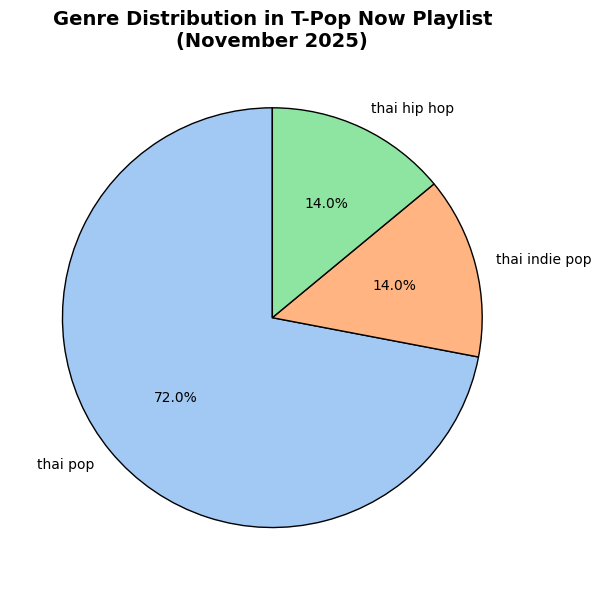

In [63]:
#Genre Distribution
plt.figure(figsize=(12, 6))
genre_counts = df_tracks['genres'].value_counts()
colors = sns.color_palette("pastel")
plt.pie(
    genre_counts.values,
    labels=genre_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title('Genre Distribution in T-Pop Now Playlist\n(November 2025)',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

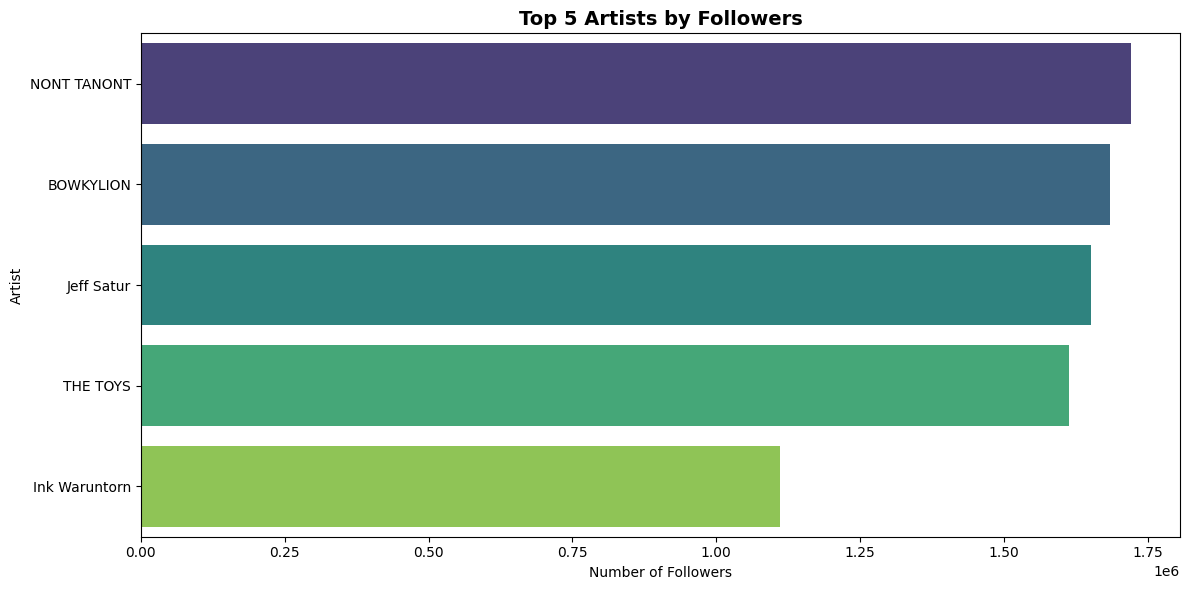

In [64]:
#Top 5 Artists
plt.figure(figsize=(12, 6))
top5 = top_artists.head(5)
sns.barplot(data=top5, y='artist_name_playlist', x='followers', palette='viridis')
plt.title('Top 5 Artists by Followers', fontsize=14, fontweight='bold')
plt.xlabel('Number of Followers')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

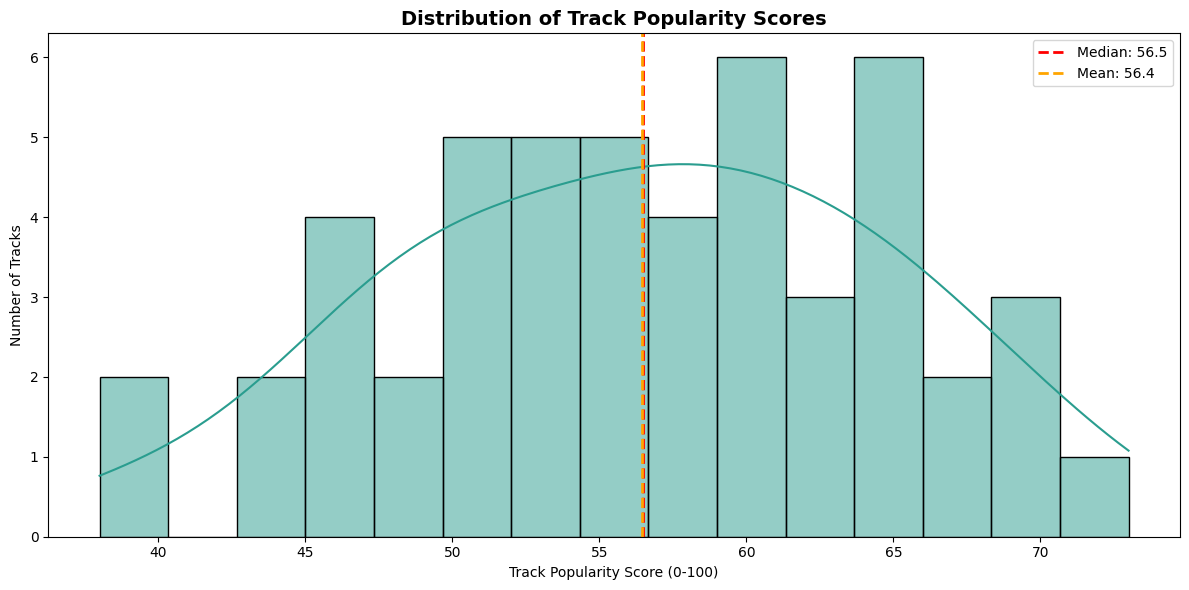

In [65]:
#Popularity Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_tracks['track_popularity'], bins=15, kde=True, color='#2a9d8f')
median_pop = df_tracks['track_popularity'].median()
mean_pop = df_tracks['track_popularity'].mean()
plt.axvline(median_pop, color='red', linestyle='--', linewidth=2,
            label=f'Median: {median_pop:.1f}')
plt.axvline(mean_pop, color='orange', linestyle='--', linewidth=2,
            label=f'Mean: {mean_pop:.1f}')
plt.title('Distribution of Track Popularity Scores', fontsize=14, fontweight='bold')
plt.xlabel('Track Popularity Score (0-100)')
plt.ylabel('Number of Tracks')
plt.legend()
plt.tight_layout()
plt.show()

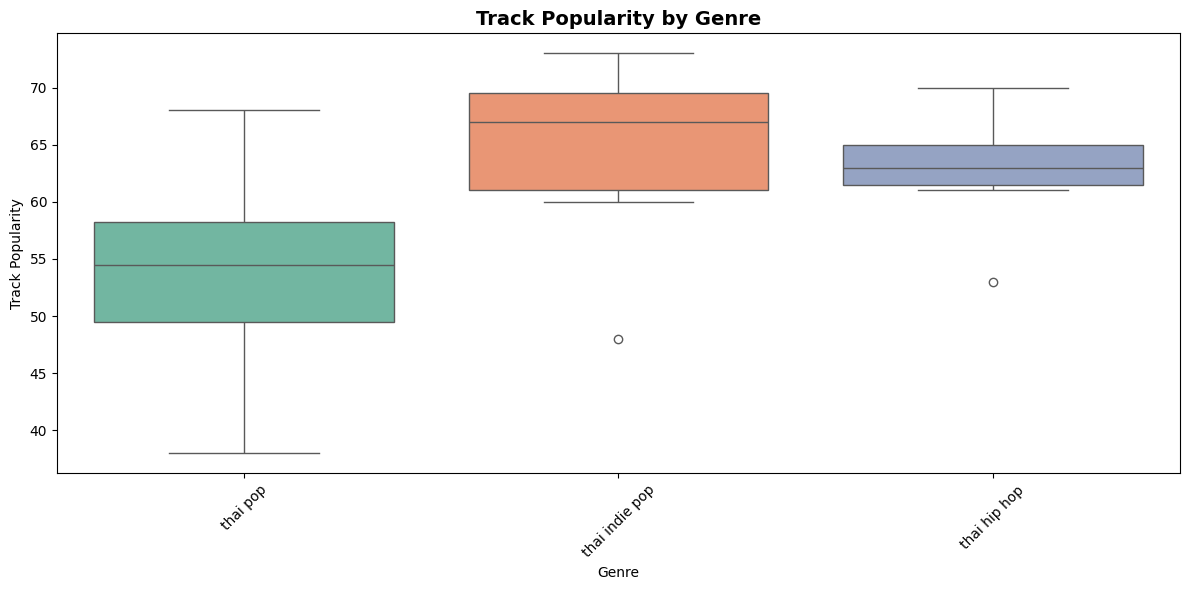

In [66]:
#Popularity by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_tracks, x='genres', y='track_popularity', palette='Set2')
plt.title('Track Popularity by Genre', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Track Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

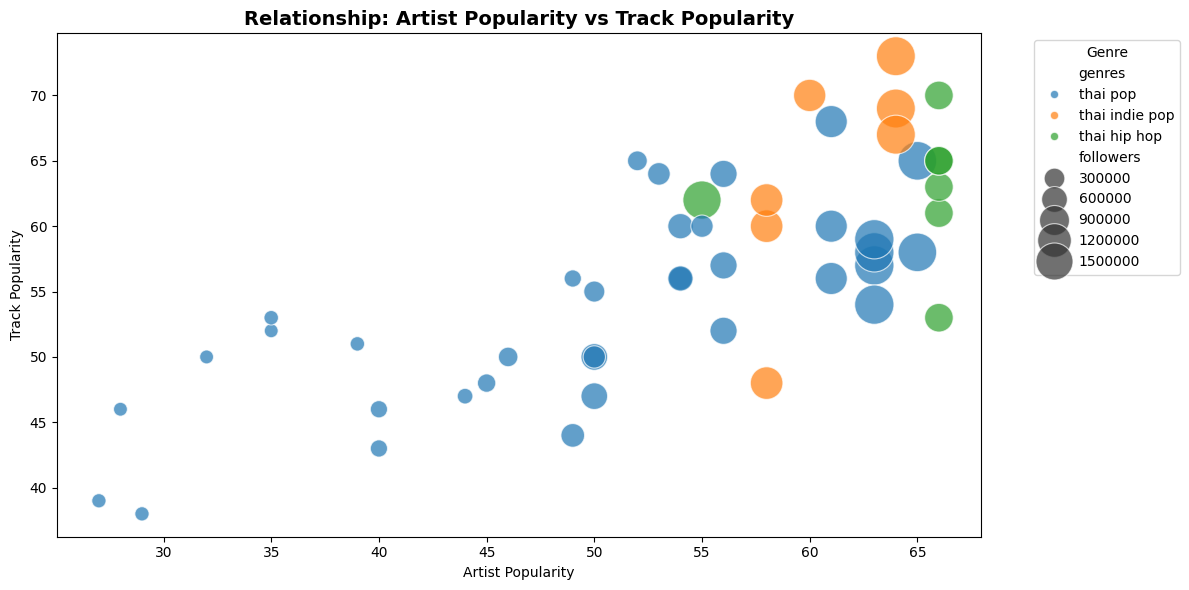

In [67]:
#Artist vs Track Popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_tracks,
    x='artist_popularity',
    y='track_popularity',
    hue='genres',
    size='followers',
    sizes=(100, 800),
    alpha=0.7
)
plt.title('Relationship: Artist Popularity vs Track Popularity',
          fontsize=14, fontweight='bold')
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Genre')
plt.tight_layout()
plt.show()


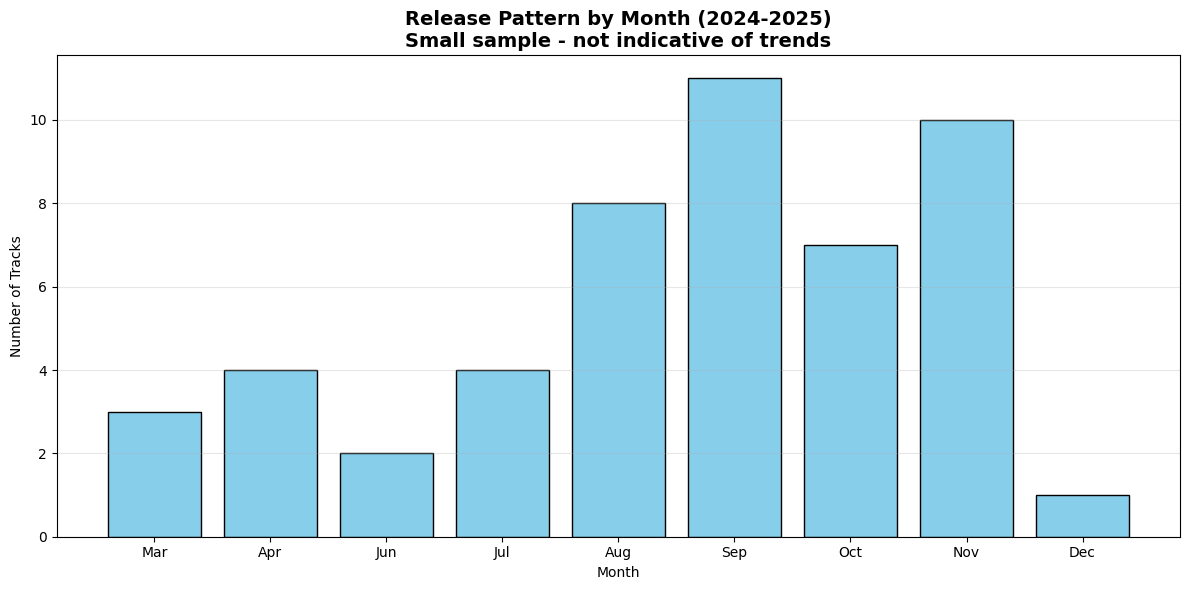

In [68]:
#Release Timeline
plt.figure(figsize=(12, 6))
release_counts = df_tracks.groupby('release_month').size()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_present = sorted(df_tracks['release_month'].unique())

plt.bar([month_names[m-1] for m in months_present],
        [release_counts[m] for m in months_present],
        color='skyblue', edgecolor='black')
plt.title('Release Pattern by Month (2024-2025)\nSmall sample - not indicative of trends',
          fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



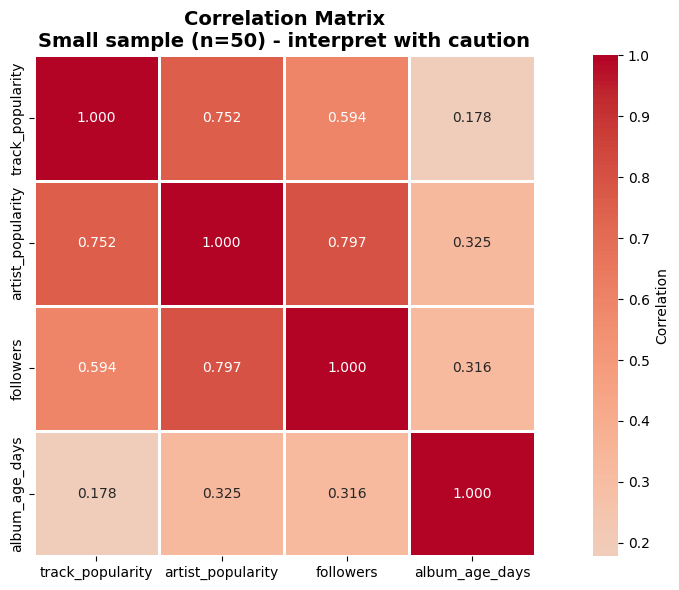

In [69]:
#Correlation Matrix
plt.figure(figsize=(12, 6))
corr_data = df_tracks[['track_popularity', 'artist_popularity', 'followers', 'album_age_days']].corr()
sns.heatmap(
    corr_data,
    annot=True,
    fmt='.3f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={'label': 'Correlation'}
)
plt.title('Correlation Matrix\nSmall sample (n=50) - interpret with caution',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()